In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import io
from scipy.stats import norm
import requests
from bs4 import BeautifulSoup
from time import sleep
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 

os.listdir(".")
from google.colab import drive 
drive.mount('/content/gdrive')
battingfile=('gdrive/My Drive/Batting.csv')
pitchingfile=('gdrive/My Drive/Pitching.csv')
battingDF = pd.read_csv(battingfile)
pitchingDF = pd.read_csv(pitchingfile)
battingDF.head()
pitchingDF.head()

#battingDF.rename(columns={"HR": "Homeruns", inplace=True})
#pitchingDF.rename(columns={"SO":"Stikeouts", inplace=True})

#%matplotlib inline

#data
SO=pitchingDF.groupby('yearID')['SO']
HR=battingDF.groupby('yearID')['HR']
CG=pitchingDF.groupby('yearID')['CG']
G=pitchingDF.groupby('yearID')['G']
AvgG=G.mean()
stdG=G.std()
SumCG=CG.sum()
medSO=SO.median()
medHR=HR.median()
stdSO=SO.std()
stdHR=HR.std()
AvgHR=HR.mean()
SumHR=HR.sum()
AvgSO=SO.mean()
SumSO=SO.sum()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Major League Baseball has been changing a lot in recent years. A few noticable trends are an increase in home runs and strikeouts. Many possible explanations have been put forth as to why this is happening. This project will help create more discussion for these explanations. First I will show the trends.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


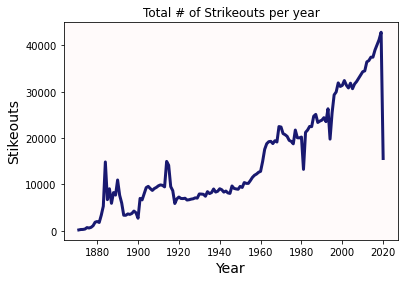

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


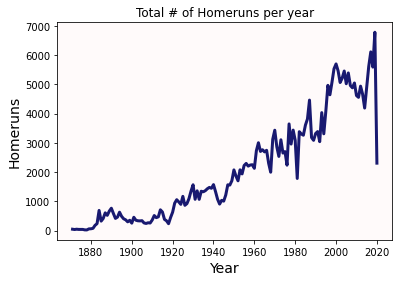

In [20]:
#sum
plt.plot(SumSO, color='midnightblue', linewidth=3)
plt.title('Total # of Strikeouts per year')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Stikeouts', fontsize=14)
ax=plt.axes()
ax.set_facecolor('snow')
#plt.grid(True)
plt.show()
plt.plot(SumHR, color='midnightblue', linewidth=3)
ax=plt.axes()
ax.set_facecolor('snow')
plt.title('Total # of Homeruns per year')
#plt.grid(True)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Homeruns', fontsize=14)
plt.show()

As you can see the total number of homeruns and strikeouts have increased steadily. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


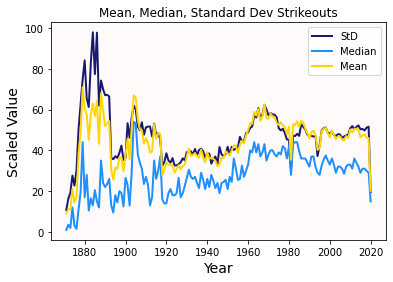

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


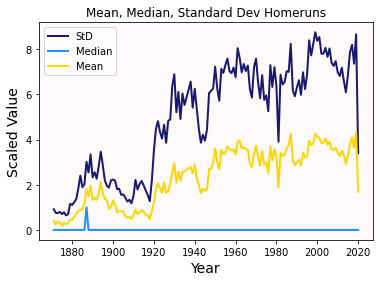

In [34]:
#mmstdso
plt.plot(stdSO,color='midnightblue', label='StD', linestyle='-', linewidth=2)
plt.plot(medSO,color='dodgerblue', label='Median', linestyle='-', linewidth=2)
plt.plot(AvgSO, color='gold', label='Mean', linestyle='-', linewidth=2)
ax=plt.axes()
ax.set_facecolor('snow')
plt.title("Mean, Median, Standard Dev Strikeouts")
plt.xlabel('Year',fontsize=14)
plt.ylabel('Scaled Value',fontsize=14)
#plt.ylim(0, 1)
plt.legend()
plt.show()

#mmstdhr
plt.plot(stdHR,color='midnightblue', label='StD', linestyle='-', linewidth=2)
plt.plot(medHR,color='dodgerblue', label='Median', linestyle='-', linewidth=2)
plt.plot(AvgHR, color='gold', label='Mean', linestyle='-', linewidth=2)
ax=plt.axes()
ax.set_facecolor('snow')
plt.title("Mean, Median, Standard Dev Homeruns")
plt.xlabel('Year',fontsize=14)
plt.ylabel('Scaled Value',fontsize=14)
#plt.ylim(0, 1)
plt.legend()
plt.show()

As expected, the mean, median, and standard deviation of player home runs follow the aggregate trends we previously observed.

For strikeouts, it doesn't fully follow the trend, but the data could be skewed by players who did not make many appearances.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


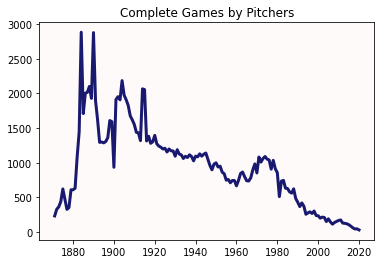

In [19]:
plt.plot(SumCG, color='midnightblue', linewidth=3)
plt.title("Complete Games by Pitchers")
ax=plt.axes()
ax.set_facecolor('snow')
plt.show()

As you can see the amount of complete games by pitchers has gone down as time has gone by. This could be an explanation for the average amount of strikeouts per pitcher going down, as more pitchers are playing as teams go to the bullpen more often. It is more common to have pitchers only pitch one inning in a game than a full nine now.

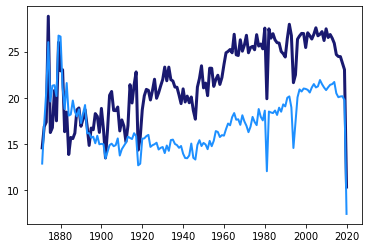

TypeError: ignored

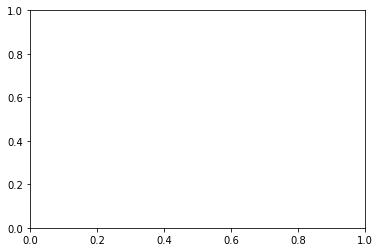

In [42]:
plt.plot(AvgG, color='midnightblue',label='Mean', linewidth=3)
plt.plot(stdG,color='dodgerblue', label='std', linestyle='-', linewidth=2 )
plt.show()
plt.plot(gam, color='midnightblue', label='Mean', linewidth=3 )
plt.show()

In [23]:
#q = pd.DataFrame(battingDF.groupby('yearID')['HR'].quantile(q=np.linspace(.10, .90, 9)))
#q.reset_index(inplace=True)
#q.columns = ['yearID', 'quantile', 'HR']
#q = q.pivot(index='yearID', columns='quantile', values='HR')
#q.reset_index(inplace=True)
#q.columns = ['yearID', 'quantile_0.1', 'quantile_0.2', 'quantile_0.3', 'quantile_0.4', 'quantile_0.5', 'quantile_0.6', 'quantile_0.7', 'quantile_0.8', 'quantile_0.9']
battingDF=battingDF.loc[battingDF['yearID'] >= 2010]
rd=pd.DataFrame(battingDF.groupby('yearID')['HR'])
i = rd.quantile([0.1, 0.3, 0.5, 0.7, 0.9]).unstack()
#df=pd.DataFrame({'10%': rd.quantile(0.1),'30%': rd.quantile(0.3), '50%': rd.quantile(0.5), '70%': rd.quantile(0.7), '90%': rd.quantile(0.9)})
#labels=['10%', '30%', '50%', '70%', '90%']
#q.plot(q,labels)
#df.plot()
plt.show()
    

In [21]:
#battingDF=battingDF.loc[battingDF['AB'] >= 150]
